# Introduction to Hierarchical Clustering

Hierarchical clustering is another unsupervised learning algorithm that is used to 
group together the unlabeled data points having similar characteristics.

Hierarchical clustering algorithms falls into following two categories −

Agglomerative hierarchical algorithms − 

In agglomerative hierarchical algorithms, each data point is treated as a single cluster 
and then successively merge or agglomerate (bottom-up approach) the pairs of clusters. 

The hierarchy of the clusters is represented as a dendrogram or tree structure.

Divisive hierarchical algorithms − 

On the other hand, in divisive hierarchical algorithms, 
all the data points are treated as one big cluster and the process of clustering involves 
dividing (Top-down approach) the one big cluster into various small clusters.

# Steps to Perform Agglomerative Hierarchical Clustering

We are going to explain the most used and important Hierarchical clustering, i.e., agglomerative. 

The steps to perform the same is as follows −

- Step 1 − Treat each data point as single cluster. 
Hence, we will be having, say K clusters at start. 
The number of data points will also be K at start.
- Step 2 − Now, in this step we need to form a big cluster by joining two closet data points. 
This will result in total of K-1 clusters.
- Step 3 − Now, to form more clusters we need to join two closet clusters. 
This will result in total of K-2 clusters.
- Step 4 − Now, to form one big cluster repeat the above three steps until K would become 0, 
i.e., no more data points left to join.
- Step 5 − At last, after making one single big cluster, 
dendrograms will be used to divide into multiple clusters depending upon the problem.

# Role of Dendrograms in Agglomerative Hierarchical Clustering

As we discussed in the last step, the role of dendrogram starts once the big cluster is formed. 

Dendrogram will be used to split the clusters into multiple cluster of related data points 
depending upon our problem. 

It can be understood with the help of following example

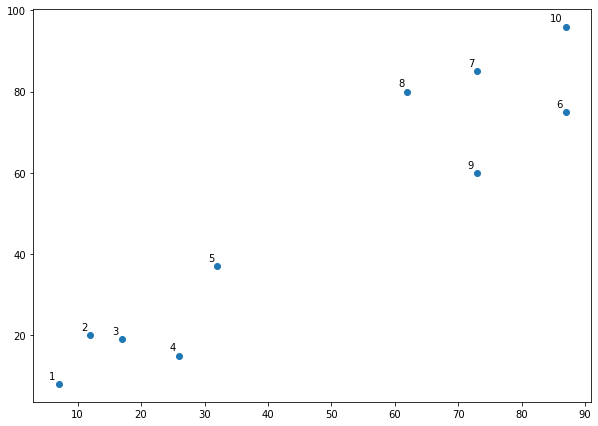

In [17]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array([[7,8],[12,20],[17,19],[26,15],[32,37],[87,75],[73,85], [62,80],[73,60],[87,96],])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
   plt.annotate(label,xy=(x, y), xytext=(-3, 3),textcoords='offset points', ha='right', va='bottom')
plt.show()

From the above diagram, it is very easy to see that we have two clusters in out data points 
but in the real world data, there can be thousands of clusters. 

Next, we will be plotting the dendrograms of our data points by using Scipy library −

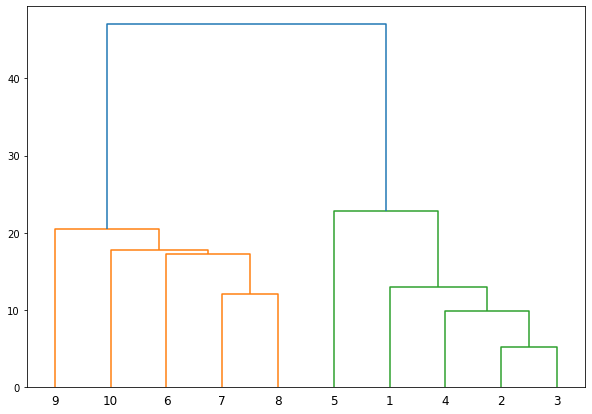

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top',labels=labelList, 
           distance_sort='descending',show_leaf_counts=True)
plt.show()

Now, once the big cluster is formed, the longest vertical distance is selected. 

A vertical line is then drawn through it as shown in the following diagram. 

As the horizontal line crosses the blue line at two points, the number of clusters would be two.

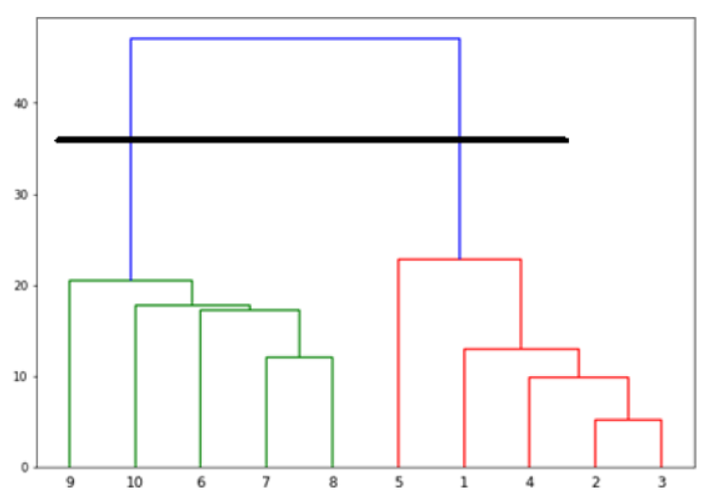

Next, we need to import the class for clustering and call its fit_predict method 
to predict the cluster. 

We are importing AgglomerativeClustering class of sklearn.cluster library

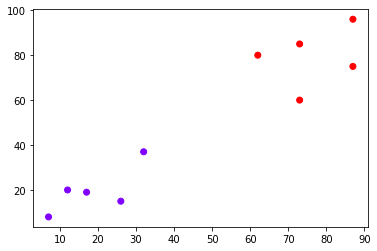

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
# Next, plot the cluster with the help of following code −
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

The above diagram shows the two clusters from our data points.

# Example 2
As we understood the concept of dendrograms from the simple example discussed above, 
let us move to another example in which we are creating clusters of the data point 
in Pima Indian Diabetes Dataset by using hierarchical clustering.

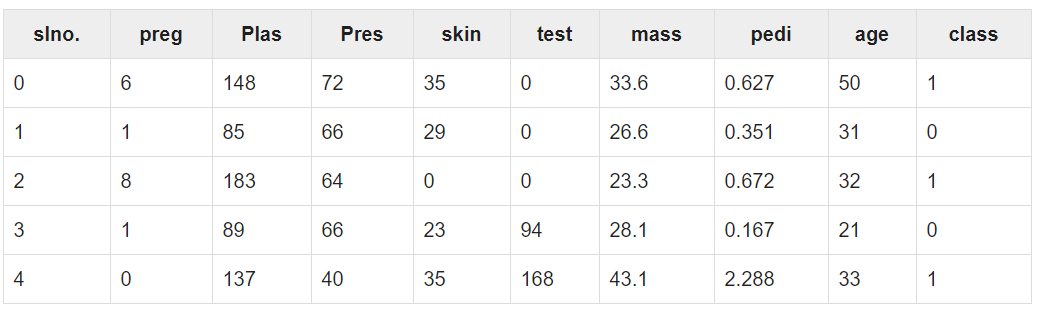

data.shape:
(768, 9)
data.head():
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
X:
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
y:
96


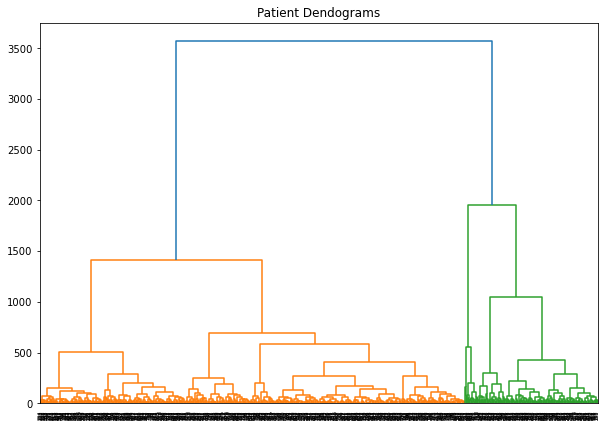

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_csv
path = r"..\csv_data\pima-indians-diabetes.csv"
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames, comment = '#')
array = data.values
X = array[:,0:8]
Y = array[:,8]
print('data.shape:')
print(data.shape)
#(768, 9)
print('data.head():')
print(data.head())
print('X:')
print(X)
print('y:')
print(y)
patient_data = data.iloc[:, 3:5].values
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Patient Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

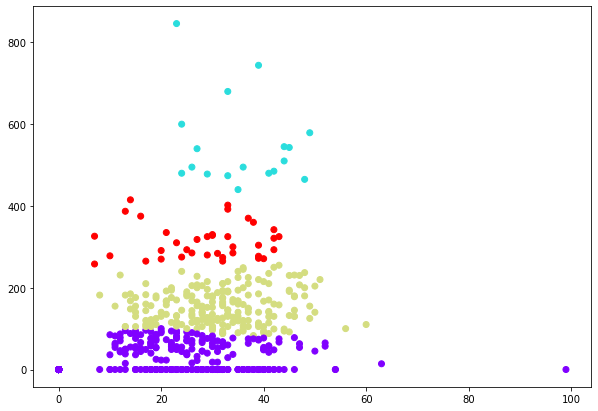

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(patient_data)
plt.figure(figsize=(10, 7))
plt.scatter(patient_data[:,0], patient_data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()